In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../IEEE-CIS Fraud Detection/data"))

['test_transaction.csv', '.DS_Store', 'train_identity.csv', 'test_identity.csv', 'sample_submission.csv', 'train_transaction.csv']


In [64]:
train_identity = pd.read_csv('./data/train_identity.csv')
train_transaction = pd.read_csv('./data/train_transaction.csv')
test_identity = pd.read_csv('./data/test_identity.csv')
test_transaction = pd.read_csv('./data/test_transaction.csv')

In [15]:
print(train_transaction.shape, train_identity.shape)

(590540, 394) (144233, 41)


In [16]:
train_transaction.isFraud.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [17]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [18]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split data

In [19]:
y_train = train_transaction['isFraud']
X_train = train_transaction.drop(columns='isFraud', axis=1)

In [20]:
print(X_train.shape, y_train.shape)

(590540, 393) (590540,)


### class distribution

In [21]:
pd.value_counts(y_train, sort=True).sort_index()

0    569877
1     20663
Name: isFraud, dtype: int64

Text(0.5,1,'Fraud class percentage')

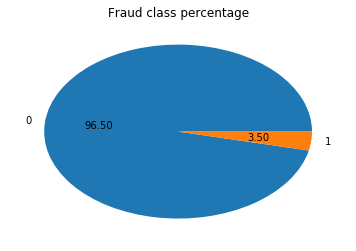

In [24]:
count_classes = pd.value_counts(y_train, sort = True).sort_index()
#count_classes.plot(kind = 'pie')
plt.pie(count_classes, labels=[0, 1], autopct='%.2f')
plt.title("Fraud class percentage")

### feature distribution

In [25]:
X_train_normal = X_train[y_train==0].rename(columns = {'TransactionDT':'Normal_Time', 'TransactionAmt':'Normal_Amount'})
X_train_fraud  = X_train[y_train==1].rename(columns = {'TransactionDT':'Fraud_Time',  'TransactionAmt':'Fraud_Amount'})

#### TIME

In [59]:
print('Normal')
print(train_transaction.TransactionDT[train_transaction.isFraud == 0].describe())
print('-'*25)
print('Fraud')
print(train_transaction.TransactionDT[train_transaction.isFraud == 1].describe())

Normal
count    5.698770e+05
mean     7.360791e+06
std      4.623930e+06
min      8.640000e+04
25%      3.010651e+06
50%      7.271678e+06
75%      1.125334e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64
-------------------------
Fraud
count    2.066300e+04
mean     7.690033e+06
std      4.416551e+06
min      8.976000e+04
25%      3.965858e+06
50%      7.575230e+06
75%      1.121743e+07
max      1.581088e+07
Name: TransactionDT, dtype: float64


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Density')

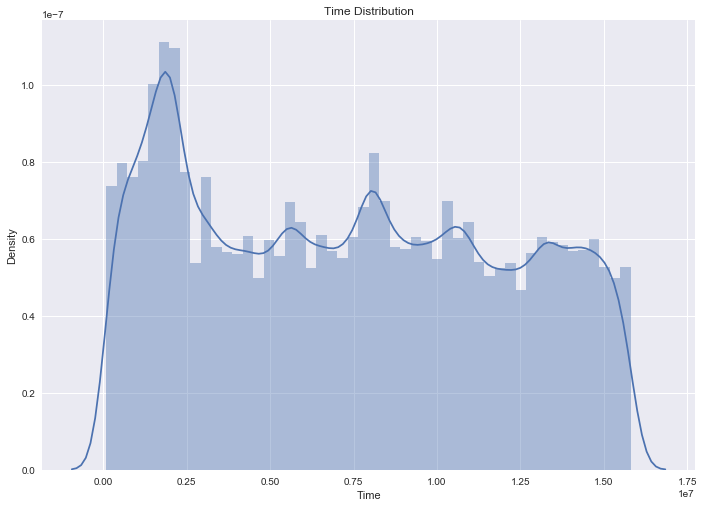

In [58]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(X_train["TransactionDT"]).set_title('Time Distribution')
plt.xlabel("Time")
plt.ylabel("Density")

Text(0,0.5,'Density')

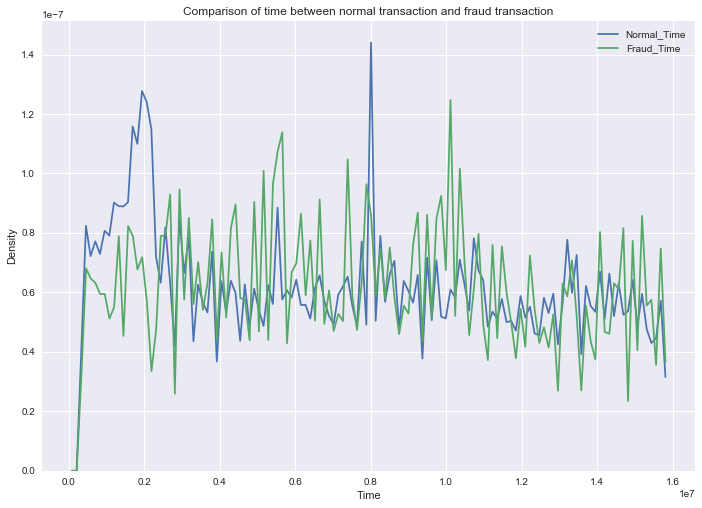

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(X_train_normal["Normal_Time"], bw=0.5)
sns.kdeplot(X_train_fraud["Fraud_Time"], bw=0.5).set_title("Comparison of time between normal transaction and fraud transaction")
plt.xlabel("Time")
plt.ylabel("Density")

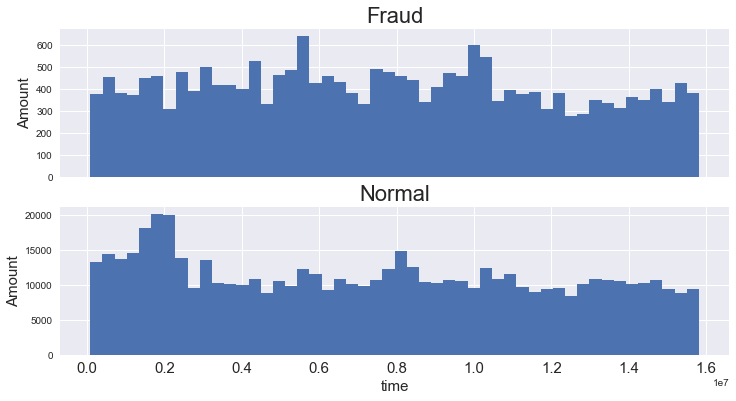

In [61]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(12,6))
bins=50
ax1.hist(train_transaction.TransactionDT[train_transaction.isFraud == 1],bins=bins)
ax1.set_title('Fraud',fontsize=22)
ax1.set_ylabel('Amount',fontsize=15)

ax2.hist(train_transaction.TransactionDT[train_transaction.isFraud == 0],bins=bins)
ax2.set_title('Normal',fontsize=22)

plt.xlabel('time',fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel('Amount',fontsize=15)
# plt.yticks(fontsize=22)
plt.show()

#### Amount distribution

In [28]:
X_train['TransactionAmt'].mean()

135.02717637293821

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 3164.85589556799)

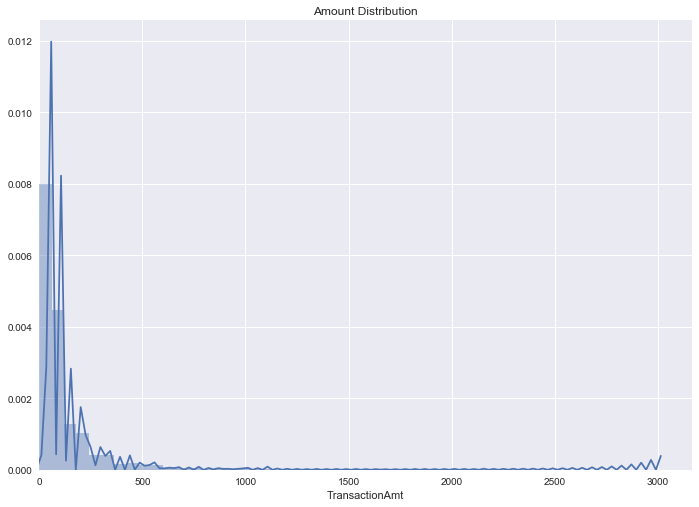

In [29]:
Amount = X_train[X_train['TransactionAmt']<=3000]['TransactionAmt']

sns.distplot(Amount).set_title('Amount Distribution')
plt.xlim(0)

Text(0.5,1,'Comparison of Amount between normal transaction and fraud transaction')

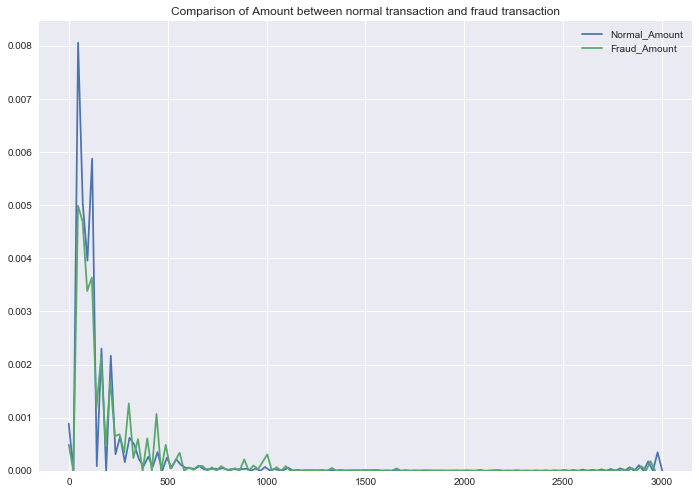

In [30]:
sns.kdeplot(X_train_normal[X_train_normal['Normal_Amount']<=3000]['Normal_Amount'], bw=0.3)
sns.kdeplot(X_train_fraud[X_train_fraud['Fraud_Amount']<=3000]['Fraud_Amount'], bw=0.3)
plt.title("Comparison of Amount between normal transaction and fraud transaction")

#### distribution of amount and time

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 400)

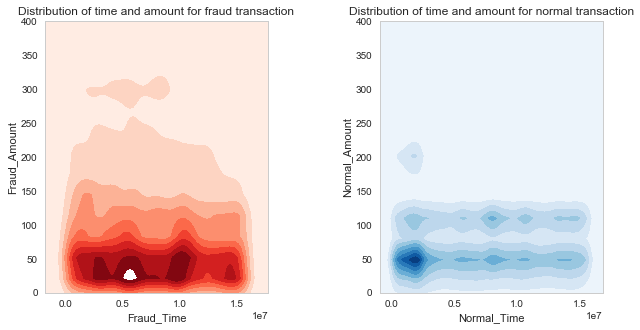

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(X_train_fraud[X_train_fraud['Fraud_Amount']<=3000]['Fraud_Time'], 
            X_train_fraud[X_train_fraud['Fraud_Amount']<=3000]['Fraud_Amount'], cmap="Reds", shade=True)
plt.title("Distribution of time and amount for fraud transaction")
plt.ylim(0,400)
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
sns.kdeplot(X_train_normal[X_train_normal['Normal_Amount']<=3000]['Normal_Time'], 
            X_train_normal[X_train_normal['Normal_Amount']<=3000]['Normal_Amount'], cmap="Blues", shade=True)
plt.title("Distribution of time and amount for normal transaction")
plt.ylim(0,400)

### distribution histogramme with all features

In [39]:
X_train.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=393)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been repl

TypeError: unsupported operand type(s) for /: 'str' and 'int'

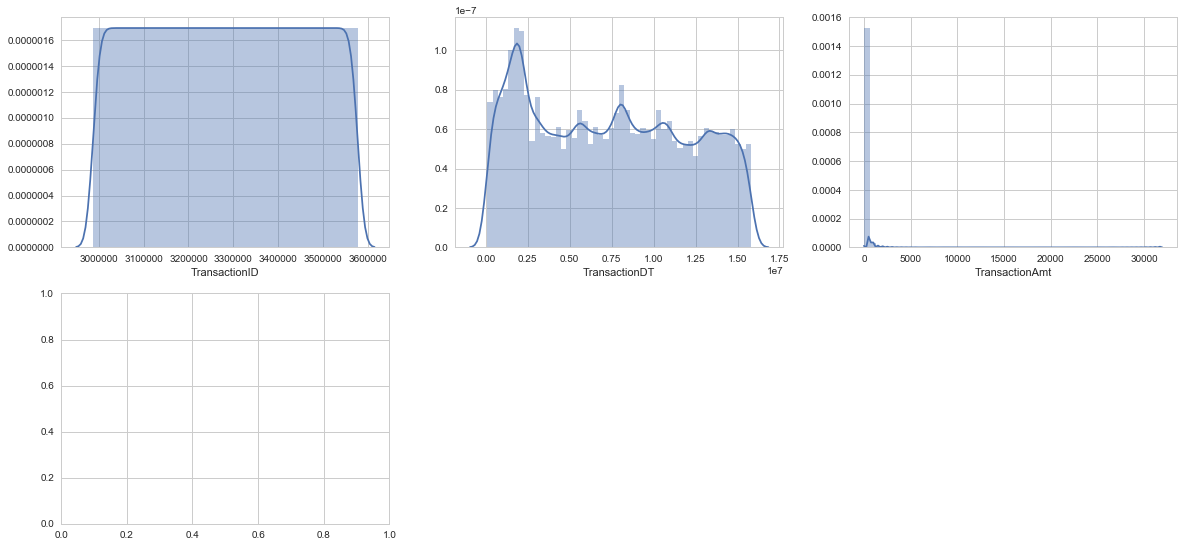

In [38]:
plt.figure(figsize=(20,50))
for i, f in enumerate(X_train.columns):
    if(type(X_train.columns)==str):
        continue;
    else:
        plt.subplot(10,3,i+1)
        sns.distplot(X_train[f])

  ### Feature Pre-processing 

In [104]:
## Delete columns which contains too many NaN
check_nan = X_train_fraud.isna().sum().apply(lambda x: x if x>7000 else 'valid')

cols_drop = pd.DataFrame(check_nan)[pd.DataFrame(check_nan)[0]!='valid'].index

In [105]:
X_train.drop(columns=cols_drop)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,86400,68.500,W,13926,NaN,150.0,discover,142.0,credit,...,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000
1,2987001,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2987002,86469,59.000,W,4663,490.0,150.0,visa,166.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2987003,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,...,135.000000,0.000000,0.000000,0.000000,50.000000,1404.000000,790.000000,0.000000,0.000000,0.000000
4,2987004,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2987005,86510,49.000,W,5937,555.0,150.0,visa,226.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2987006,86522,159.000,W,12308,360.0,150.0,visa,166.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2987007,86529,422.500,W,12695,490.0,150.0,visa,226.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2987008,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2987009,86536,117.000,W,17399,111.0,150.0,mastercard,224.0,debit,...,0.000000,0.000000,495.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [112]:
train_identity

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,...,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,...,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


### Corrleation Matrix

#### Correlation Matrix of different Classes¶


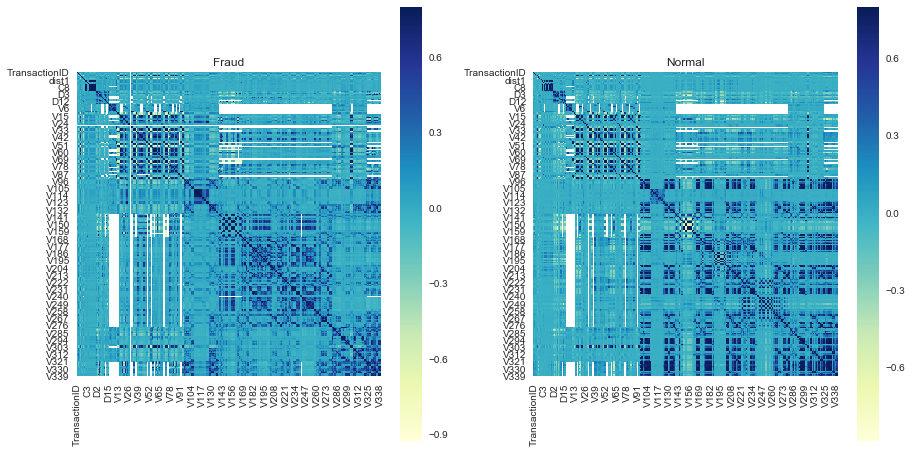

In [43]:
##Before Sampling
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.heatmap(X_train_fraud.corr(), vmax=.8, square=True, ax=ax1, cmap='YlGnBu')
ax1.set_title('Fraud')

sns.heatmap(X_train_normal.corr(), vmax=.8, square=True, ax=ax2, cmap='YlGnBu');
ax2.set_title('Normal')

plt.show()

transation columns:
    ID 
    Fraud_time
    Fraud_amount
    productCD
    card1 - card6
    addr1 addr2
    dist1 dist2
    emaildomain P - R
    C1 - C14
    D1 - D15
    M1 - M9
    V1 - V339

In [66]:
#After undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

X_resampled = pd.DataFrame(data=X_resampled, columns=X_train.columns)
y_resampled = pd.DataFrame(data=y_resampled, columns=['y'])

ValueError: Input contains NaN